# Chapter 10

In [1]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import patsy
from sklearn.model_selection import train_test_split
import os

## 1.(a)

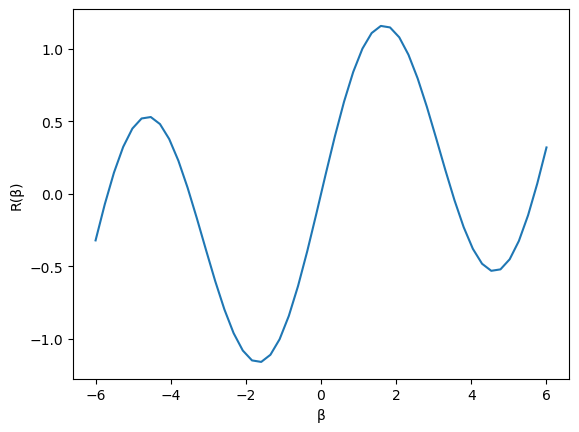

In [3]:
b = np.linspace(-6, 6)

y = np.sin(b) + b * 1/10

plt.plot(b, y)
plt.xlabel('β')
plt.ylabel('R(β)')

### (b)

$$ R(β) = \frac{θ R(β)}{θ β} = cos(β)+1/10$$

### (c)

$$β^{m+1}\leftarrow β^{m} - \rho\cdot R(β^{m})$$

*local_min* takes an initial condition $β^0$ and adjusts it based on the gradient evaluated at that point. The gradient will be calculated using the derivative from the previous exercise 6b), evaluated at $β^{m}$:

$$ R(β^{m}) = \frac{θ R(β)}{θ β}\Bigr|_{β=β^{m}} = cos(β^{m})+1/10$$

Using the gradient and the learning rate $\rho$, The initial condition $β^0$ will be adjusted to get a new value $β^1$.  

$$β^{m+1}\leftarrow β^{m} - \rho \cdot [cos(β^{m}) + 1/10]$$
$$β^{1}\leftarrow β^{0} - \rho \cdot [cos(β^{0}) + 1/10]$$

The process will be repeated using the new value $β^1$, which will be adjusted to get $β^2$, etc.  This process repeats until the gradient is less than a certain threshold and the function terminates, indicating a local minimum has been found:

What a run looks like with $\rho=0.1$:
$$β^{1}\leftarrow β^{0} - 0.1 \cdot [cos(β^{0}) + 1/10]$$
$$β^{2}\leftarrow β^{1} - 0.1 \cdot [cos(β^{1}) + 1/10]$$
$$\vdots$$

In [4]:
def local_min(b_0, p = 0.1):    
    betas = []
    
    derivative = np.cos(b_0) + 1/10
    
    while not np.abs(derivative) < 0.000001 :
        betas.append(b_0)
        b_0 -= p * derivative
        derivative = np.cos(b_0) + 1/10      
        
    betas.append(b_0)
    return betas

In [5]:
b = local_min(2.3)

In [6]:
first_betas = b[0:3]
optimal_beta = b[-1]

min_beta = min(b)
max_beta = max(b)

xt = np.append(np.arange(min_beta - 1, max_beta + 1, 1), first_betas)
xt = np.round(xt, decimals = 1)
xt = np.append(xt, optimal_beta)
xt = np.sort(xt)
xt = np.unique(xt)

In [7]:
num_betas = len(b)

xt_labels = []
i = 0

for item in xt:
    if b[0] <= item <= b[2]:
        xt_labels.append(fr'$\beta^{i}$')
        i += 1
    elif item == optimal_beta:
        xt_labels.append(fr'$\beta^{{{num_betas}}}$')
    else:
        xt_labels.append(item)

Text(0, 0.5, 'R(β)')

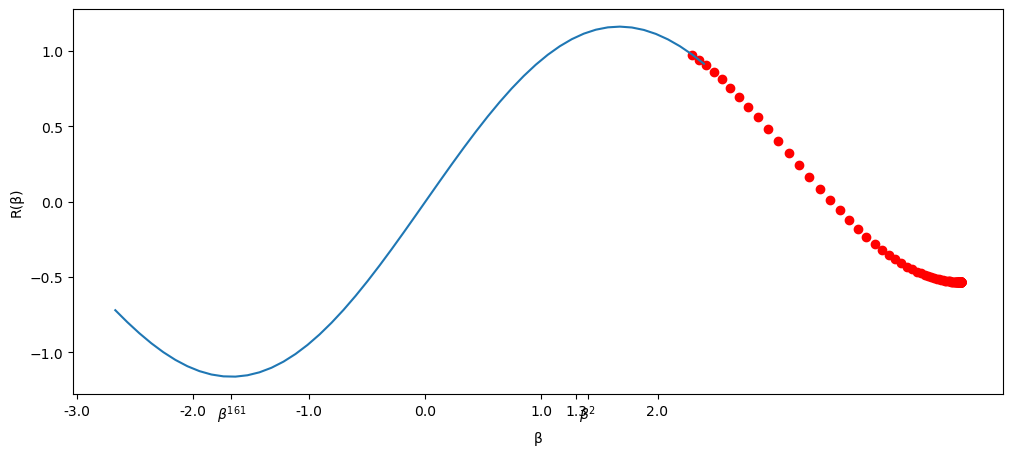

In [44]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

x = np.linspace(min_beta - 1, max_beta + 1)

ax.plot(x, np.sin(x) + np.array(x) / 10)
ax.scatter(b, np.sin(b) + np.array(b) / 10, color='red')
ax.set_xticks(xt, labels = xt_labels)
ax.set_xlabel('β')
ax.set_ylabel('R(β)')

### (d)

In [9]:
c = local_min(1.4)

In [10]:
first_betas = c[0:3]
optimal_beta = c[-1]

min_beta = min(c)
max_beta = max(c)


xt = np.append(np.arange(min_beta - 1.3, max_beta + 0.7, 1), first_betas)
xt = np.round(xt, decimals=1)
xt = np.append(xt, optimal_beta)
xt = np.sort(xt)
xt = np.unique(xt)

In [11]:
num_betas = len(c)

xt_labels = []
i = 2

for item in xt:
    if c[2] <= item <= c[0]:
        xt_labels.append(fr'$\beta^{i}$')
        i -= 1
    elif item == optimal_beta:
        xt_labels.append(fr'$\beta^{{{num_betas}}}$')
    else:
        xt_labels.append(item)

Text(0, 0.5, 'R(β)')

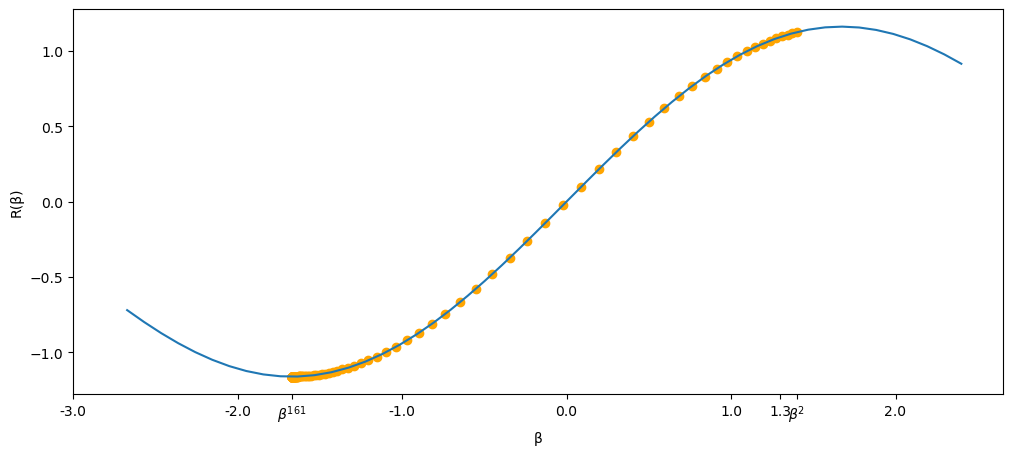

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

x = np.linspace(min_beta - 1, max_beta + 1)

ax.plot(x, np.sin(x) + np.array(x) / 10)
ax.scatter(c, np.sin(c) + np.array(c) / 10, color='orange')
ax.set_xticks(xt, labels = xt_labels)
ax.set_xlabel('β')
ax.set_ylabel('R(β)')

## 2.

In [3]:
default = pd.read_csv("Default.csv")

In [14]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [15]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

In [16]:
formula_string = formula_from_cols(default, 'default')

In [17]:
formula_string

'default ~ student + balance + income'

In [18]:
def convert_to_int(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [19]:
default['default_int'] = default['default'].apply(convert_to_int)

In [20]:
x = patsy.dmatrix(formula_like = 'student + balance + income - 1', data = default)

x_scale = patsy.scale(x, ddof=1)

y = np.array(default['default_int'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.2, random_state=42)

### Neural Network

In [22]:
modnn = tf.keras.Sequential(
    [
            tf.keras.layers.Dense(units = 10,
                                  activation='relu'),
            tf.keras.layers.Dropout(rate=0.4),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
    ]
)

In [23]:
modnn.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics='accuracy'
             )

In [24]:
history = modnn.fit(x_train, 
                    y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_test, y_test), 
                    verbose = 0)

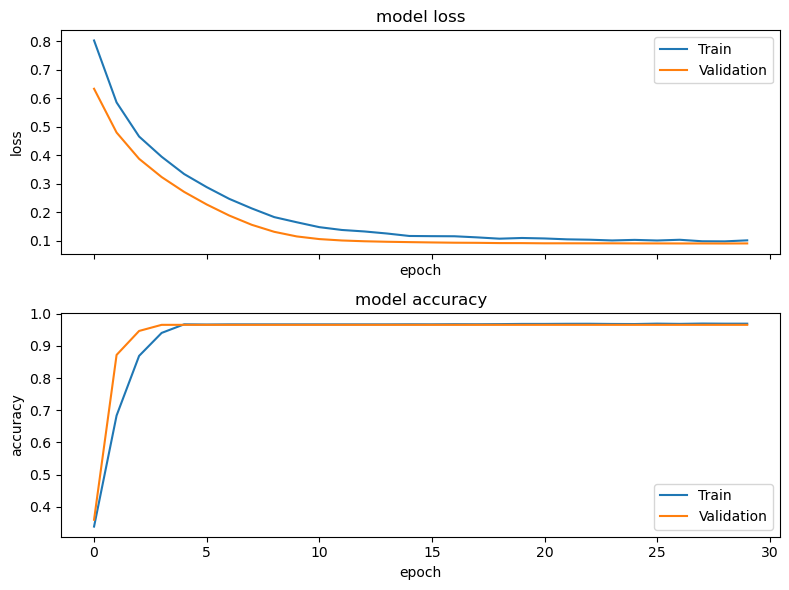

In [25]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(8,6))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('model loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('model accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['Train', 'Validation'])


In [26]:
modnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [27]:
y_prob = modnn.predict(x_test)
y_pred_classes = y_prob > 0.5

63/63 [==============================] - 0s 920us/step


In [28]:
modnn_acc = np.mean(y_pred_classes.flatten() == y_test)
modnn_acc

0.9655

### Logistic Regression

In [29]:
modlr = tf.keras.Sequential(
    [
            tf.keras.layers.Dense(units = 1,
                                  activation='sigmoid')
    ]
)

In [30]:
modlr.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics='accuracy'
             )

In [31]:
history = modlr.fit(x_train, 
                    y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_test, y_test), 
                    verbose = 0)

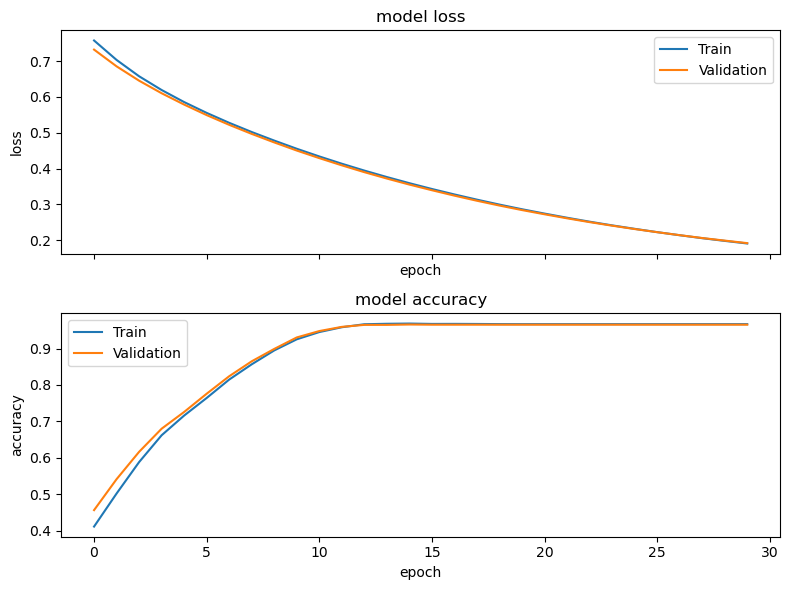

In [32]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(8,6))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('model loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('model accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['Train', 'Validation'])


In [33]:
y_prob = modlr.predict(x_test)
y_pred_classes = y_prob > 0.5

63/63 [==============================] - 0s 1ms/step


In [34]:
modlr_acc = np.mean(y_pred_classes.flatten() == y_test)
modlr_acc

0.9655

In [35]:
modlr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


**Assumption**

Both Neural Network and Logistic Regression has the same outcomes, with ~97% accuracy. 

## 3.

In [40]:
images = os.listdir('./images')

num_images = len(images)

x = []
for name in images:
    if not name.startswith('.'):
        image = tf.keras.preprocessing.image.load_img('./images' + '/' + name, target_size=(224, 224))
        x.append(tf.keras.preprocessing.image.img_to_array(image))

x = np.array(x)

x = tf.keras.applications.imagenet_utils.preprocess_input(x)

In [41]:
cnnmodel = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

In [42]:
cnnpred = cnnmodel.predict(x)
decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(cnnpred, top=3)

1/1 [==============================] - 1s 1s/step


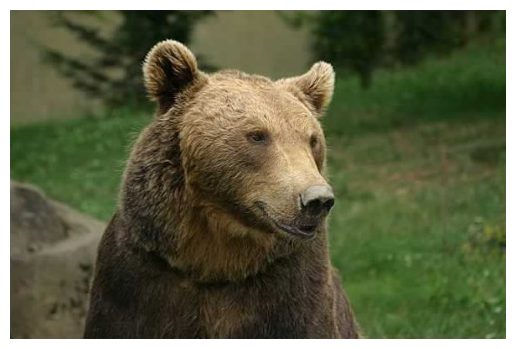

('n02132136', 'brown_bear', 0.9997688)
('n02133161', 'American_black_bear', 0.000119020224)
('n02134084', 'ice_bear', 2.5418902e-05)


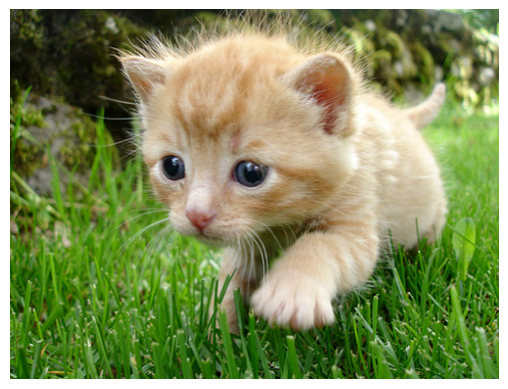

('n02123159', 'tiger_cat', 0.21259604)
('n02127052', 'lynx', 0.077382445)
('n02112018', 'Pomeranian', 0.058879394)


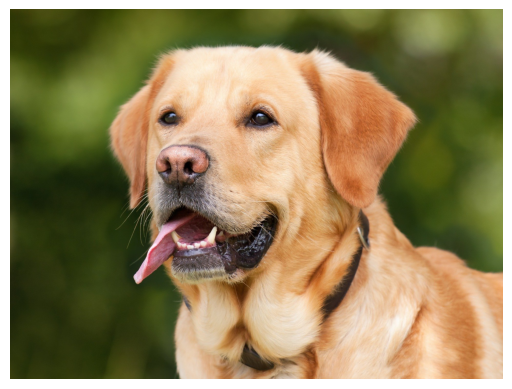

('n02099712', 'Labrador_retriever', 0.85925055)
('n02099601', 'golden_retriever', 0.108707786)
('n02087394', 'Rhodesian_ridgeback', 0.020261688)


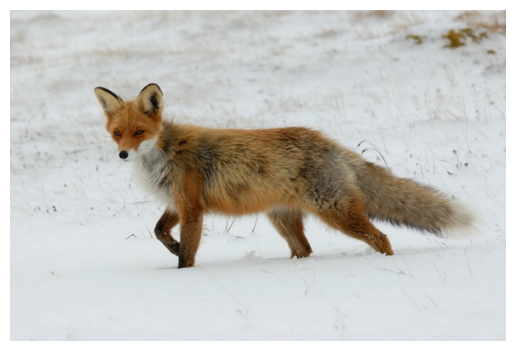

('n02114855', 'coyote', 0.64916897)
('n02119022', 'red_fox', 0.31687066)
('n02119789', 'kit_fox', 0.022616621)


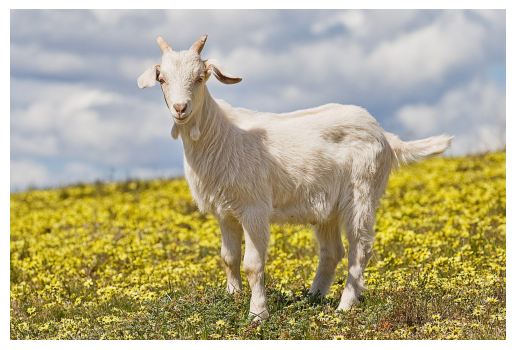

('n11879895', 'rapeseed', 0.72430015)
('n02326432', 'hare', 0.05160387)
('n02113799', 'standard_poodle', 0.04563869)


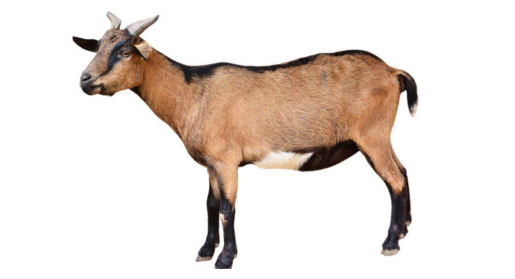

('n02417914', 'ibex', 0.89209336)
('n02422106', 'hartebeest', 0.08097809)
('n02412080', 'ram', 0.012781267)


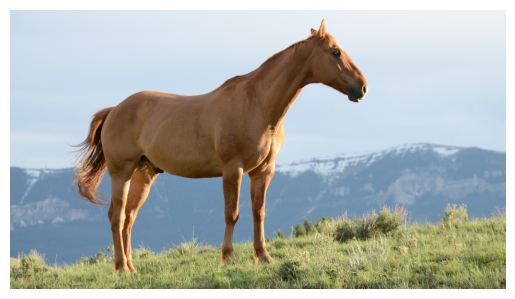

('n02389026', 'sorrel', 0.754132)
('n02422106', 'hartebeest', 0.090721324)
('n02437312', 'Arabian_camel', 0.06140485)


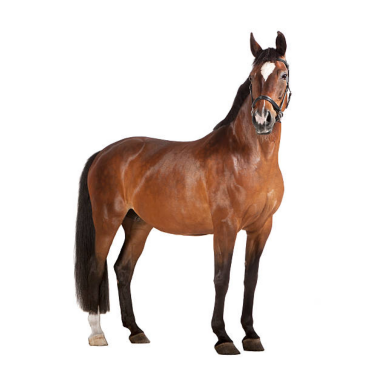

('n02389026', 'sorrel', 0.9818657)
('n02422106', 'hartebeest', 0.00417844)
('n03803284', 'muzzle', 0.0033464457)


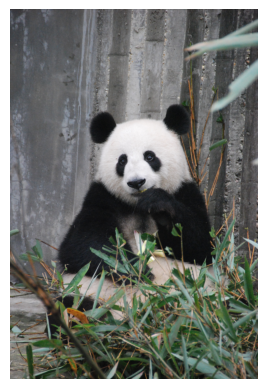

('n02510455', 'giant_panda', 0.9980902)
('n02509815', 'lesser_panda', 0.0018997109)
('n04254680', 'soccer_ball', 1.3878137e-06)


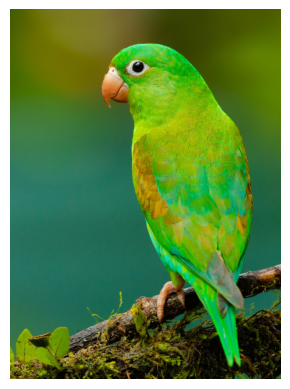

('n01820546', 'lorikeet', 0.6874041)
('n01818515', 'macaw', 0.05678577)
('n01828970', 'bee_eater', 0.029220495)


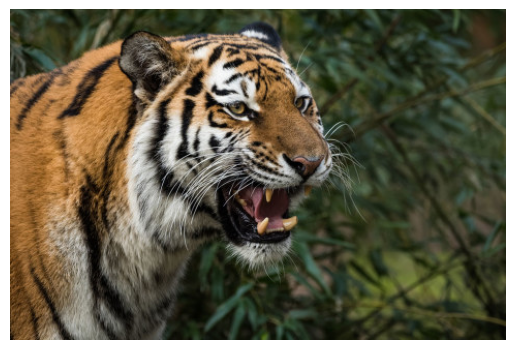

('n02129604', 'tiger', 0.8634625)
('n02123159', 'tiger_cat', 0.13479866)
('n02127052', 'lynx', 0.0014256707)


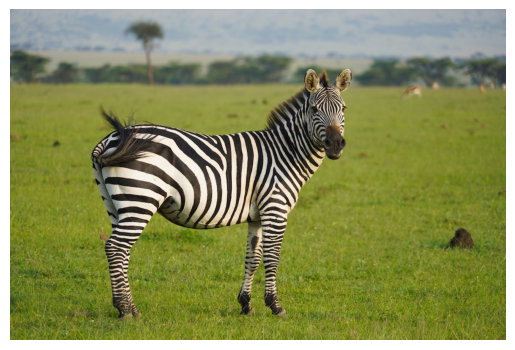

('n02391049', 'zebra', 0.98317474)
('n02422106', 'hartebeest', 0.0025250495)
('n01798484', 'prairie_chicken', 0.0014832503)


In [43]:
i=0

for name in images:
    if not name.startswith('.'):
        image = mpimg.imread('./images' + '/' + name)

        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
        for pred in decoded_preds[i]:
            print(pred)
        
        i+=1

**Assumptions**

Above we pass images to the CNN and the classification with the top 3 highest probabilities.  

* Brown bear, Tiger, Zebra: The predictions here are actually the highest between all the pictures with a probability of ~99.9 percent near 100.(same with the pictures with white backround). Those types of animals are very easy to tell them apart. Maybe there are some spieces between them but clearly the CNN is very accurate on those kinds of animals.
* Cat: here the 3 best predictions are different cat races. The highest of them all is the 'tiger_cat' which is not that off the image. Also the image representing a baby cat which that probably makes the probability so small. If it was a aged cat I think it would for sure been higher.
* Dog: Actually here the prediction is on point with a high probability of the a labrador retriever with ~86% and golden retriever which comes from the same race has ~10%. That obviously makes sense the the CNN made the right prediction.
* Coyote: The most interesting example so far. As a coyote is so similar to a fox. Here we have some expected results with a coyote probability of ~64% and a fox with probability of 31%. The algorithm actually distinguished the difference between a coyote and a fox which actually is the size between them. A coyote is generally much larger and more muscular than a fox.
*  Goat: Here actually we have 2 examples of goats. One image with a backround larger on surface than the goat itself and one that it is a clear image with white backround. It does matter if the image has a backround picture on the results. As we can see the one with the backround, a probability of ~72& is a race of a goat. On the other hand, the probability in the next picture is much higher with a probability of ~90%. So the backround actually affects the results of the algorithtm.
* Horse: We actually did the same as the goat example to see if it is the backround that changes the result or actually the animal. But as expected the results are the same with the goat example. 
    1. With backround: 75%
    2. White backround: 98%
* Panda: Here is a interesting example too. Althought the CNN made a prediction with a probability of ~99% to be a panda. There is a very very small chance(1.3878137e-06) that the picture shows a soccer ball. That is funny for sure but there is an explanation for that. As it seems the colors of a panda are white and black, which the same goes for a classic soccer ball. It is not reasonabe at all but there is a slight chance of that.

# 4. NYSE Data

### (a)

In [17]:
nyse = pd.read_csv("prices-split-adjusted.csv")
nyse["date"] = pd.to_datetime(nyse["date"])
nyse.set_index("date", inplace=True)
display(nyse.sample(15))


,symbol,open,close,low,high,volume
date,,,,,,
2015-01-06,L,40.669998,40.020000,39.799999,40.799999,1064400.0
2015-05-19,SHW,291.739990,292.440002,291.100006,294.350006,671700.0
2015-07-01,VFC,70.080002,71.589996,69.919998,71.690002,2543800.0
2013-07-25,LNT,26.575001,26.764999,26.455000,26.805000,718200.0
2015-11-02,LEG,45.189999,45.849998,45.009998,45.880001,815100.0
2012-06-21,ULTA,97.400002,95.050003,94.510002,97.419998,1060700.0
2014-04-22,ETFC,21.000000,21.650000,20.830000,21.670000,5466500.0
2011-12-08,PWR,20.629999,20.180000,20.120001,20.700001,2386400.0
2010-10-14,MMC,24.010000,24.000000,23.879999,24.170000,3495900.0


In [33]:
from statsmodels.tsa.arima.model import ARIMA

nyse = pd.read_csv("prices-split-adjusted.csv", parse_dates=["date"], index_col="date")
nyse_monthly = nyse.resample("M").last()  
nyse_monthly["month"] = nyse_monthly.index.month 
nyse_monthly = nyse_monthly.dropna()

model = ARIMA(nyse_monthly["close"], order=(5, 0, 0), exog=nyse_monthly[["month"]])
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   84
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -170.040
Date:                Sat, 18 Mar 2023   AIC                            356.080
Time:                        18:30:14   BIC                            375.527
Sample:                    01-31-2010   HQIC                           363.898
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2242     14.968      2.220      0.026       3.888      62.560
month         -0.0155      0.081     -0.192      0.848      -0.174       0.143
ar.L1          0.8303      0.101      8.260      0.0

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
window_size = 10

data = []
for i in range(window_size, len(nyse)):
    x = nyse["close"].values[i-window_size:i]
    y = nyse["close"].values[i]
    data.append((x, y))
data = pd.DataFrame(data, columns=["input", "output"])

n_train = int(len(data) * 0.8)
train, test = data[:n_train], data[n_train:]

model = LinearRegression()
model.fit(train["input"].tolist(), train["output"])

y_pred = model.predict(test["input"].tolist())
r2 = r2_score(test["output"], y_pred)
print("Test R2:", r2)

Test R2: -0.020045099860716675


In [42]:
import statsmodels.api as sm


window_size = 1
data = []
for i in range(window_size, len(nyse)):
    x = nyse["close"].values[i-1]
    y = nyse["close"].values[i]
    data.append((x, y))
data = pd.DataFrame(data, columns=["input", "output"])

n_train = int(len(data) * 0.8)
train, test = data[:n_train], data[n_train:]

model = sm.OLS(train["output"]  , sm.add_constant(train["input"])).fit()

y_pred = model.predict(sm.add_constant(test["input"]))
r2 = r2_score(test["output"], y_pred)
print("Test R2:", r2)

Test R2: -0.03631599187350365


**Assumptions**

>* "flatten approach advantage":it allows us to use a wider range of input features, which can be useful for capturing more complex patterns in the data. 
>* Disadvantage: it requires more data pre-processing and feature engineering, and may also be more computationally expensive.

>* lm() advantage: simple and straightforward way to fit a linear AR model to the data. 
>* Disadvantage: it only allows us to use a single lagged value as the input feature, which may not be sufficient for capturing more complex patterns in the data.

### 5. 

In [43]:
stock = 'AAPL'
data = nyse[nyse.symbol == stock].close.values.reshape(-1, 1)

seq_length = 10

n_train = int(len(data) * 0.8)
train, test = data[:n_train], data[n_train:]

X_train, y_train = [], []
for i in range(seq_length, len(train)):
    X_train.append(train[i-seq_length:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(seq_length, len(test)):
    X_test.append(test[i-seq_length:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [44]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Test R2: {r2:.4f}")

Test R2: 0.8549


### 6.

In [ ]:
nyse = pd.read_csv("prices-split-adjusted.csv")

# add day of week variable
nyse['date'] = pd.to_datetime(nyse['date'])
nyse['dayofweek'] = nyse['date'].dt.dayofweek

def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(data[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

np.random.seed(7)

dataset = nyse[['open', 'dayofweek']].values.astype('float32')

# normalize 
dataset -= np.mean(dataset, axis=0)
dataset /= np.std(dataset, axis=0)

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, 1)
testX, testY = create_dataset(test, 1)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = (trainPredict * np.std(train[:, -1])) + np.mean(train[:, -1])
trainY = (trainY * np.std(train[:, -1])) + np.mean(train[:, -1])
testPredict = (testPredict * np.std(test[:, -1])) + np.mean(test[:, -1])
testY = (testY * np.std(test[:, -1])) + np.mean(test[:, -1])


print("Test R2 score:", r2_score(testY, testPredict))

681009/681009 - 1121s - loss: 0.0055 - 1121s/epoch - 2ms/step
5321/5321 [==============================] - 8s 1ms/step
Test R2 score: 0.995933250545549


7.

In [63]:
from keras.datasets import imdb
from keras.layers import   Embedding
from sklearn.metrics import accuracy_score
from keras_preprocessing.sequence import pad_sequences

dict_sizes = [1000, 3000, 5000, 10000]

for dict_size in dict_sizes:
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=dict_size)


    X_train = pad_sequences(X_train, maxlen=500)
    X_test = pad_sequences(X_test, maxlen=500)

    model = Sequential()
    model.add(Embedding(dict_size, 32, input_length=500))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

    # Evaluate
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Dict size: %d, Test accuracy: %.2f%%" % (dict_size, scores[1]*100)) 

Epoch 1/3
391/391 [==============================] - 285s 725ms/step - loss: 0.5205 - accuracy: 0.7345 - val_loss: 0.3832 - val_accuracy: 0.8349
Epoch 2/3
391/391 [==============================] - 271s 694ms/step - loss: 0.3756 - accuracy: 0.8407 - val_loss: 0.3626 - val_accuracy: 0.8467
Epoch 3/3
391/391 [==============================] - 261s 669ms/step - loss: 0.3650 - accuracy: 0.8470 - val_loss: 0.3921 - val_accuracy: 0.8291
Dict size: 1000, Test accuracy: 82.91%
Epoch 1/3
391/391 [==============================] - 312s 794ms/step - loss: 0.5208 - accuracy: 0.7360 - val_loss: 0.4013 - val_accuracy: 0.8274
Epoch 2/3
391/391 [==============================] - 284s 727ms/step - loss: 0.3503 - accuracy: 0.8491 - val_loss: 0.3257 - val_accuracy: 0.8688
Epoch 3/3
391/391 [==============================] - 298s 762ms/step - loss: 0.3371 - accuracy: 0.8571 - val_loss: 0.5228 - val_accuracy: 0.7338
Dict size: 3000, Test accuracy: 73.38%
Epoch 1/3
391/391 [==============================] -

**Assumptions**

>By varying the dictionary size, we can observe the effect on the model's performance. <br>
Increasing the dictionary size, generally, can improve the model's performance by providing more information to the model, <br>
but it also increases the computational complexity and may lead to overfitting.